In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [10]:
df=pd.read_csv("C:\\Users\\91947\\Desktop\\Zidio Development\\AAPL.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400


In [11]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

Changing Date variable to datetime

In [12]:
df['Date']=pd.to_datetime(df['Date'])
df.dtypes 

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

Checking wheter the dataset has any null values 

In [13]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

setting the column Date as Index

In [14]:
df.set_index('Date',inplace=True)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400
1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200
1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000
1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400
1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400
...,...,...,...,...,...,...
2020-03-26,246.520004,258.679993,246.360001,258.440002,258.440002,63021800
2020-03-27,252.750000,255.869995,247.050003,247.740005,247.740005,51054200
2020-03-30,250.740005,255.520004,249.399994,254.809998,254.809998,41994100


Descriptive statistics 

In [15]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,9909.000000,9909.000000,9909.000000,9909.000000,9909.000000,9.909000e+03
mean,32.606849,32.936079,32.277560,32.618030,30.576570,8.582916e+07
std,58.415759,59.001576,57.883037,58.471899,56.746275,8.597195e+07
min,0.198661,0.198661,0.196429,0.196429,0.155638,3.472000e+05
25%,1.071429,1.089286,1.048571,1.071429,0.917643,3.304230e+07
50%,1.729286,1.758929,1.696429,1.732143,1.466154,5.766490e+07
75%,35.799999,36.265713,35.328571,35.761429,31.042374,1.069992e+08
max,324.739990,327.850006,323.350006,327.200012,327.200012,1.855410e+09


In [16]:
df['Daily Range']=df['High']-df['Low'] # Helps to understand how much a stock flunctuates on daily basis
df['Price change']=df['Close']-df['Open'] # wheter the price went up or down
df['Daily Return']= df['Price change']/df['Open']# how much profit can be made if someone buys at the open price and sells it on close price 
df

,Open,High,Low,Close,Adj Close,Volume,Daily Range,Price change,Daily Return
Date,,,,,,,,,
1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400,0.002232,0.000000,0.000000
1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200,0.002232,-0.002232,-0.004566
1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000,0.002232,-0.002232,-0.004926
1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400,0.002232,0.000000,0.000000
1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400,0.002232,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
2020-03-26,246.520004,258.679993,246.360001,258.440002,258.440002,63021800,12.319992,11.919998,0.048353
2020-03-27,252.750000,255.869995,247.050003,247.740005,247.740005,51054200,8.819992,-5.009995,-0.019822
2020-03-30,250.740005,255.520004,249.399994,254.809998,254.809998,41994100,6.120010,4.069992,0.016232


In [17]:
df.to_csv('cleaned_stock_market_data.csv',index=True)

# Univariate Analysis

C:\Users\91947\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


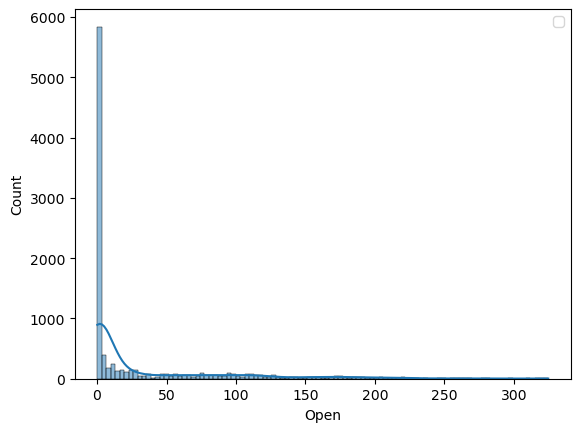

In [18]:
sns.histplot(df['Open'],kde=True)
plt.legend()
plt.show()

C:\Users\91947\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


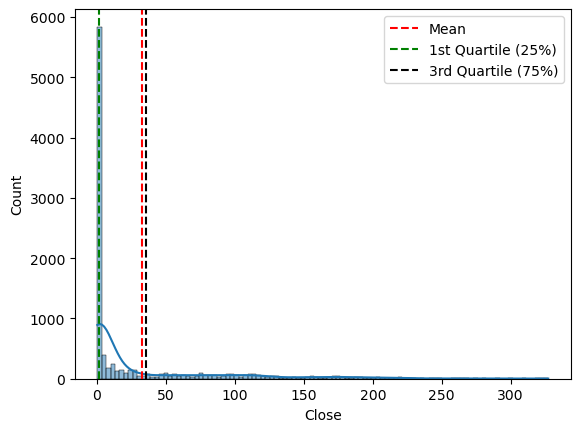

In [17]:
sns.histplot(df['Close'],kde=True)
plt.axvline(x=np.mean(df['Close']), color='red', linestyle="--", label='Mean')
plt.axvline(x=np.percentile(df['Close'], 25), color='green', linestyle="--", label='1st Quartile (25%)')
plt.axvline(x=np.percentile(df['Close'], 75), color='black', linestyle="--", label='3rd Quartile (75%)')
plt.legend()
plt.show()

C:\Users\91947\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


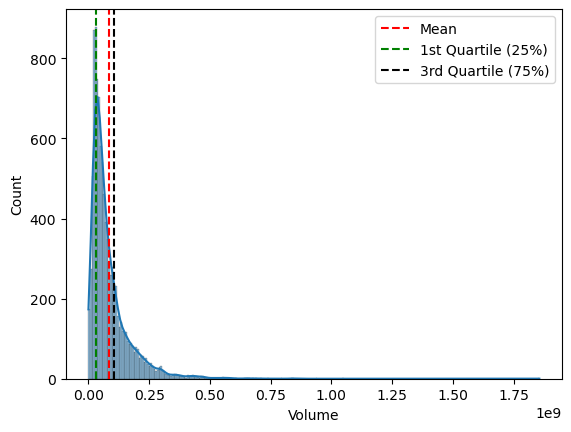

In [19]:
sns.histplot(df['Volume'],kde=True)
plt.axvline(x=np.mean(df['Volume']), color='red', linestyle="--", label='Mean')
plt.axvline(x=np.percentile(df['Volume'], 25), color='green', linestyle="--", label='1st Quartile (25%)')
plt.axvline(x=np.percentile(df['Volume'], 75), color='black', linestyle="--", label='3rd Quartile (75%)')
plt.legend()
plt.show()

# Bivariate Analysis

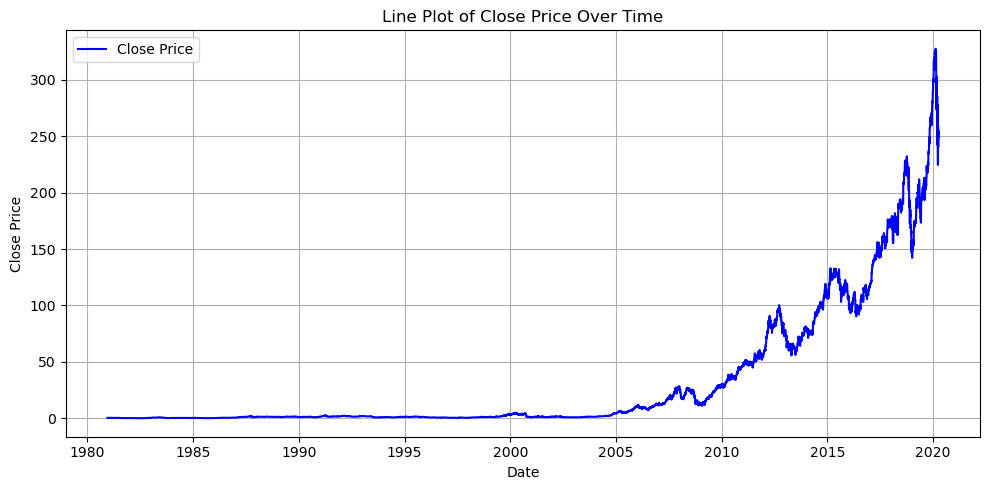

In [28]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df["Close"], label="Close Price", color='blue')

plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Line Plot of Close Price Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

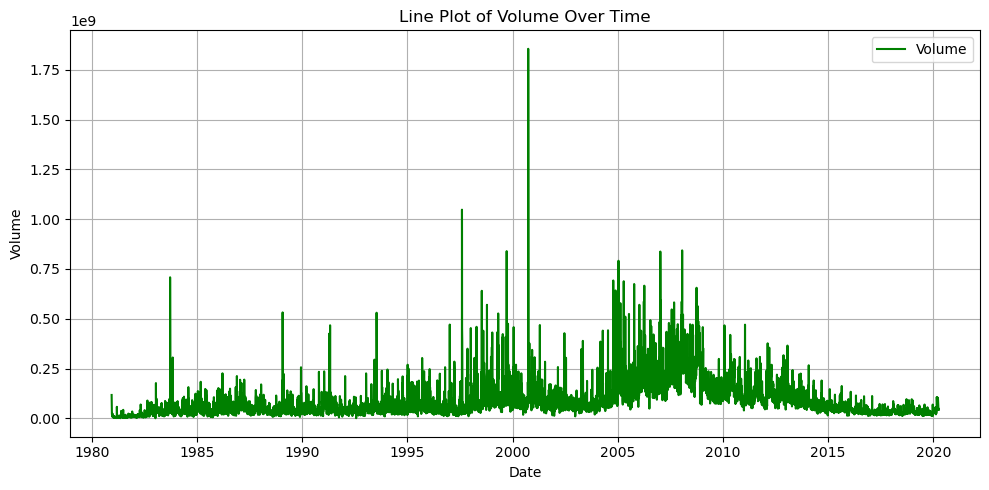

In [22]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df["Volume"], label="Volume", color='green')

plt.xlabel("Date")
plt.ylabel("Volume")
plt.title("Line Plot of Volume Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

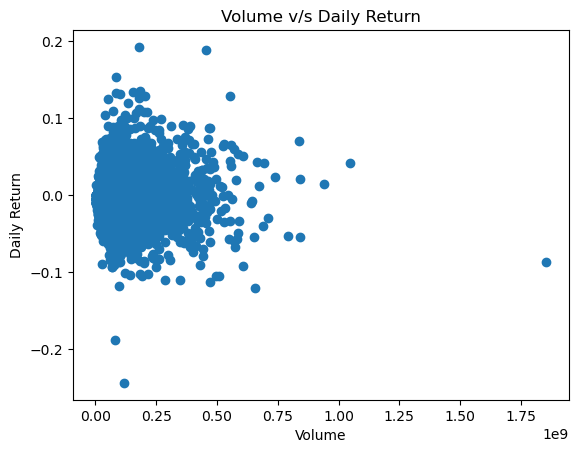

In [24]:
plt.scatter(x=df['Volume'], y=df["Daily Return"])
plt.xlabel('Volume')
plt.ylabel('Daily Return')
plt.title('Volume v/s Daily Return')
plt.show()

In [26]:
corr_matrix=df.corr()
corr_matrix

,Open,High,Low,Close,Adj Close,Volume,Daily Range,Price change,Daily Return
Open,1.000000,0.999935,0.999931,0.999878,0.998933,-0.133347,0.786655,0.053551,0.011172
High,0.999935,1.000000,0.999887,0.999929,0.999041,-0.132296,0.791128,0.060905,0.013553
Low,0.999931,0.999887,1.000000,0.999931,0.998992,-0.135045,0.781847,0.061361,0.013736
Close,0.999878,0.999929,0.999931,1.000000,0.999098,-0.133697,0.786359,0.069148,0.016111
Adj Close,0.998933,0.999041,0.998992,0.999098,1.000000,-0.142612,0.787798,0.071869,0.016465
Volume,-0.133347,-0.132296,-0.135045,-0.133697,-0.142612,1.000000,0.007832,-0.030528,0.009173
Daily Range,0.786655,0.791128,0.781847,0.786359,0.787798,0.007832,1.000000,0.029344,0.003222
Price change,0.053551,0.060905,0.061361,0.069148,0.071869,-0.030528,0.029344,1.000000,0.316294
Daily Return,0.011172,0.013553,0.013736,0.016111,0.016465,0.009173,0.003222,0.316294,1.000000
